In [29]:
import numpy as np
from numpy.linalg import inv, eigh,eig
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
def kernel_unnormalized(g1, g2,lamb):
    one = np.ones(g1.number_of_nodes())

    A1 = nx.adjacency_matrix(g1.to_undirected(),weight=None).todense()    
    A2 = nx.adjacency_matrix(g2.to_undirected(),weight=None).todense()

    Lamb1,U1 = eig(A1)
    Lamb2,U2 = eig(A2)
    
    L = np.kron(one.transpose().dot(U1), one.transpose().dot(U2))
    R = np.kron(U1.transpose().dot(one), U2.transpose().dot(one))

    D = 1/(1 - lamb*np.kron(Lamb1,Lamb2))
    
    k = L.dot(np.diag(D)).dot(R.transpose())
    
    return k[0,0]

In [144]:
def pairwise_kernels(graphs,lamb, kernel_func):
    n = len(graphs)
    K = np.zeros((n,n))
    for i in range(0,n):
        for j in range(i,n):
            k = kernel_func(graphs[i],graphs[j],lamb)
            K[i,j] = k
            K[j,i] = k
    return K

In [149]:
lamb = .0001
res = {}
for w in range(0,28,7):
    graphs = [nx.read_gml('./data/taxi-2014-NTA/12/NTACycle%02dSnap0.gml'%d) for d in range(w,w+7)]
    K = pairwise_kernels(graphs,lamb,kernel_unnormalized)
    res[w] = K

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


un_normalized 0.0001
[  3.47975996e+05   9.35649368e+02   2.90791170e+00   3.26650159e-01
   1.65893544e-02   6.37116509e-06   8.36328509e-05]


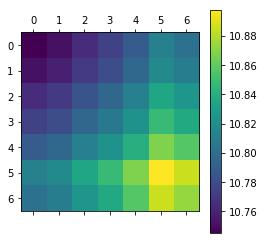

[  3.47964833e+05   8.65044019e+02   4.34409186e+00   1.05571146e+00
   6.11978363e-03   1.10906485e-03   5.01993660e-06]


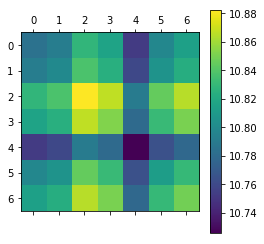

[  3.65212830e+05   1.28411613e+03   4.76876282e+00   8.48869417e-01
   4.11238328e-03   8.70613782e-04   1.44863385e-05]


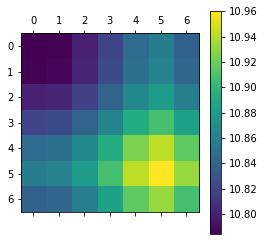

[  3.58849972e+05   1.66228284e+03   9.49360548e+00   5.57515770e-01
   2.17479179e-02   1.56985091e-05   4.07592301e-04]


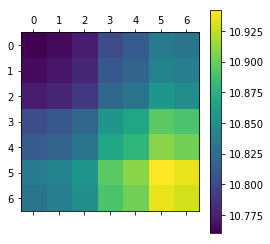

In [150]:
print('un_normalized',lamb)
for w,K in res.items():
    print(np.linalg.eigvals(K))
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()

un_normalized 2.5e-05
[-185020.26097226  186573.77808671   47106.19949908   37594.94445984
  -24762.56476893     995.60492834   -2858.08142796]


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


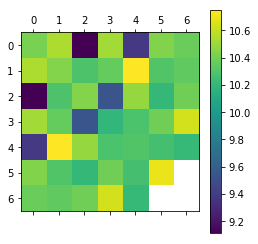

[ 223070.46993371  -68827.98290023   69313.21394491   43594.48462847
   25417.71220717   -2393.28658294    4742.74861044]


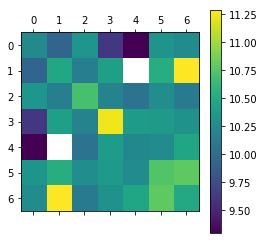

[ 285790.32365542 -169642.90592165   94029.81542609  -35848.96040035
   18150.01159712   -6370.49674245    2926.18586278]


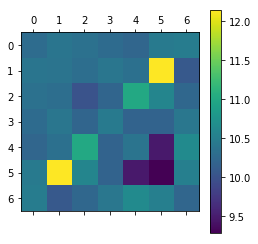

[ 206497.72281319   77995.83536498  -70907.00699841   32287.29797172
    1591.8278557   -19012.12172928  -13133.35393972]


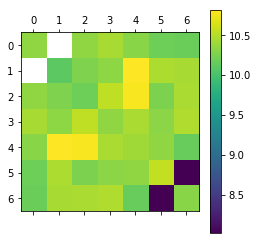

In [142]:
print('un_normalized',lamb)
for w,K in res.items():
    print(np.linalg.eigvals(K))
    plt.matshow(np.log(K))
    plt.colorbar()
    plt.show()

In [129]:
g=nx.read_gml('./data/taxi-2014-NTA/12/NTACycle03Snap0.gml')

In [130]:
A1 = nx.adjacency_matrix(g).todense()

In [131]:
Lamb1,U1 = np.linalg.eig(A1)

In [132]:
one = np.ones(g.number_of_nodes())

In [133]:
#U1.dot(np.diag(Lamb1)).dot(inv(U1))

In [134]:
for i in range(g.number_of_nodes()):
    for j in range(i+1,g.number_of_nodes()):
        if np.linalg.norm(U1[:,i] - U1[:,j]) ==0:
            print(True);break

True
True
True
True


In [109]:
U1[:,1].shape

(195, 1)